# Algebra2: Solucion de Ecuaciones

## Se resuelven ecuaciones en una variable , en dos variables y en tres variables.
Importamos los modulos que se requieren

In [1]:
from sympy import symbols, roots, solve
x,a,b,c,d,e=symbols('x a b c d e')

# resolver la ecuacion cuadratica
f = a*x**2 + b*x + c

r = roots(f,x)
display(r)

{-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a): 1,
 -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a): 1}

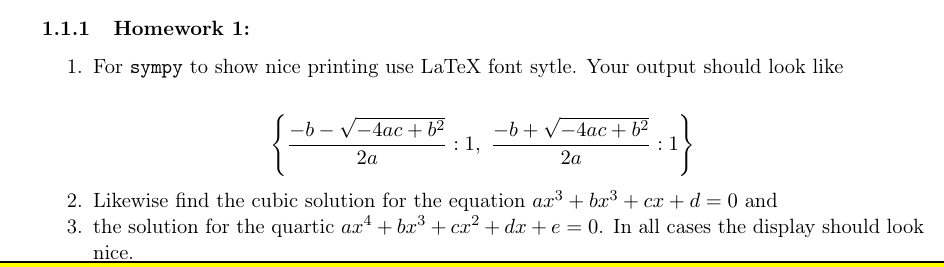

$$ x^2 - 1 = (x-1)(x+1) .$$
Las raices son $x=\pm 1$.

In [3]:
x = symbols('x')
f = x**2 - 1
roots(f)




{-1: 1, 1: 1}

In [4]:
g = f*(x+1) # x=-1 esta dos veces
roots(g)

{1: 1, -1: 2}

In [6]:
# usamos ahora solve
sln = solve(g,x) #lista?
print(sln)
type(sln)

[-1, 1]


list

In [8]:
# una ecuacion mas complicada
h2 = x**3 - x - 8
slns = solve(h2,x)
slns

[(-1/2 - sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3) + 1/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3)),
 1/(3*(-1/2 + sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3),
 1/(3*(sqrt(1293)/9 + 4)**(1/3)) + (sqrt(1293)/9 + 4)**(1/3)]

In [9]:
display(slns)

[(-1/2 - sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3) + 1/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3)),
 1/(3*(-1/2 + sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3),
 1/(3*(sqrt(1293)/9 + 4)**(1/3)) + (sqrt(1293)/9 + 4)**(1/3)]

In [12]:
# escribimos el polinomio factorizado teniendo las raices
h3 = (x - slns[0])*(x-slns[1])*(x - slns[2])
h3

(x - 1/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3))*(x - (-1/2 + sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3) - 1/(3*(-1/2 + sqrt(3)*I/2)*(sqrt(1293)/9 + 4)**(1/3)))*(x - (sqrt(1293)/9 + 4)**(1/3) - 1/(3*(sqrt(1293)/9 + 4)**(1/3)))

In [13]:
from sympy import simplify
h3simp = simplify(h3)
h3simp

x**3 - x - 8

In [17]:
h2 == h3simp

True

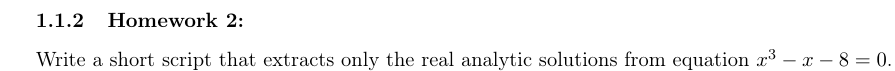

Observe las siguientes simplificaciones

$$ \frac{3x}{x^2 + 2x} = \frac{3}{x+2} .$$
$$ \frac{x^2-1}{x+1} = x-1 .$$
Veamos estas simplificaciones en `SymPy`.

In [21]:
simplify(3*x/(x**2 + 2*x))

3/(x + 2)

In [22]:
simplify( (x**2-1)/(x+1))

x - 1

In [23]:
p = x**2 + x + 2
q = x
simplify(p/q)

x + 1 + 2/x

In [24]:
## cancel
from sympy import cancel
cancel ( (x**2-1)/(x+1))

x - 1

In [25]:
# usando ratsim (simplicacion racional)
from sympy import ratsimp
ratsimp( (x**2-1)/(x+1))

x - 1

In [28]:
# soluciones numericas. nsolve
from sympy import nsolve
nsolve(h2, x, 1000) # argumentos: la funcion, la variable independiente y el valor de cercania

2.16631274739779

In [30]:
# help(nsolve)

In [32]:
# conversion de soluciones analticas a numericas
from sympy import N
# comprehensive list
n = len(slns)
[N(slns[i]) for i in range(n)]

[-1.08315637369889 - 1.58735099762265*I,
 -1.08315637369889 + 1.58735099762265*I,
 2.16631274739779]

## Ecuacionese lineales simultaneas.

Por ejemplo:

\begin{eqnarray}
x = 3 y - z \\
5x - 3z = y
\end{eqnarray}

Como se resuelve esto en `SymPy`?



In [33]:
from sympy import Eq, linsolve

x,y,z = symbols('x  y   z')
eq1 = Eq(x, 3*y-z) # x = 3y-z
eq2 = Eq(5*x - 3*z, y) # 5x - 3z = y

linsolve([eq1, eq2], x,y, z)  # esta es la ecuacion de una linea


{(5*z/7, 4*z/7, z)}

In [35]:
# como extraer informacion de ecuaciones
# dir(eq1)
display(eq1.rhs)
display(eq1.lhs)

3*y - z

x

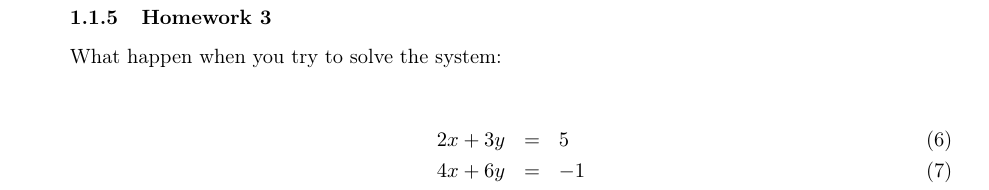

## Ploting curves (graficar curvas)
Sabemos que `matplotlib` es una gran libreria (modulo) para graficar. Pero `SymPy` tambien se puede usar para graficar. El modulo para esto es
`plot_implicit()`.

In [40]:
from sympy import plot_implicit, symbols, Eq, Or

x,y = symbols('x y') # en una tupla, puede ser tambien en una lista
# extraccion de soluciones, usando una tupla
eq1 = Eq(2*x + 3*y, 5)
eq2 = Eq(4*x - 2*y, -6)
solution = solve( (eq1, eq2), (x,y))
solution # es un diccionario con keys, values


{x: -1/2, y: 2}

In [45]:
# las extraemos una tupla
# dir(solution)
x,y = solution.values()
display(x,y)

-1/2

2

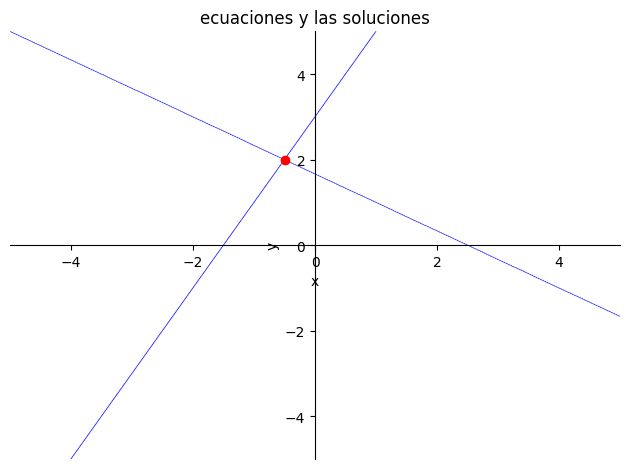

In [50]:
# grafica
p= plot_implicit( Or(eq1, eq2), xlabel='x', ylabel='y', \
        title="ecuaciones y las soluciones", markers=[{'args':[x,y,'ro']}])

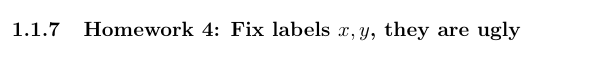

## solucion de ecuaciones no lineales.


Por ejemplo:

\begin{eqnarray}
x^2 + y^2 &=& 25 \\
x - y &=& 3
\end{eqnarray}




In [52]:
# definamos los simbolos
x,y = symbols('x y')

# definimos las ecuaciones
eq1 = Eq( x**2 + y**2,  25)
eq2 = Eq(x-y, 3)

# se resuelve el sistema
solution = solve( (eq1, eq2),(x,y))

print("Solution:")
display(solution)

Solution:


[(3/2 - sqrt(41)/2, -sqrt(41)/2 - 3/2), (3/2 + sqrt(41)/2, -3/2 + sqrt(41)/2)]

In [53]:
# la solucion es una lista. Como obtener la solucion como un conjunto
# otra forma de resolver sistemas
from sympy import solveset
display( solveset(x**2 + x -1 ,x))

{-1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2}

In [55]:
display(solveset( x**2 + 2*x + 1, x))

{-1}

In [57]:
roots(x**2 + 2*x +1)

{-1: 2}

(3/2 - sqrt(41)/2, -sqrt(41)/2 - 3/2) (3/2 + sqrt(41)/2, -3/2 + sqrt(41)/2)


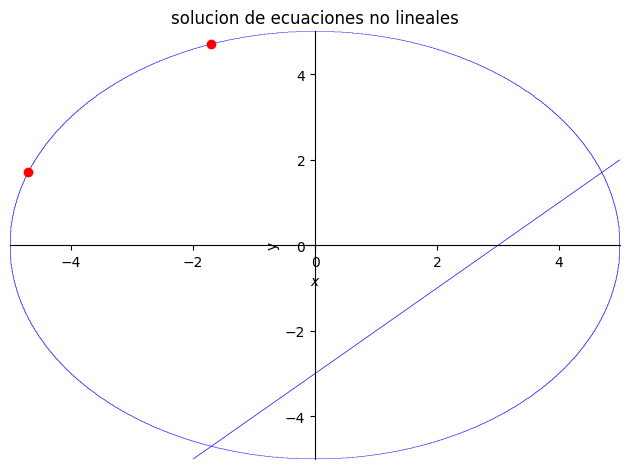

In [58]:
# para la grafica
# extraemos las soluciones, en una lista
[x, y] = solution
print(x,y)

p =plot_implicit( Or(eq1, eq2), xlable='x', ylabel='y', \
                 title="solucion de ecuaciones no lineales", markers=[{'args': [x,y,'ro']}])




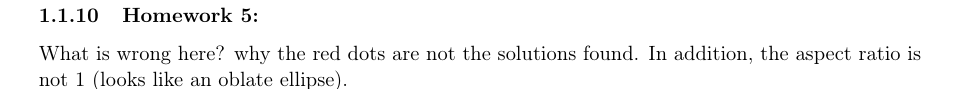

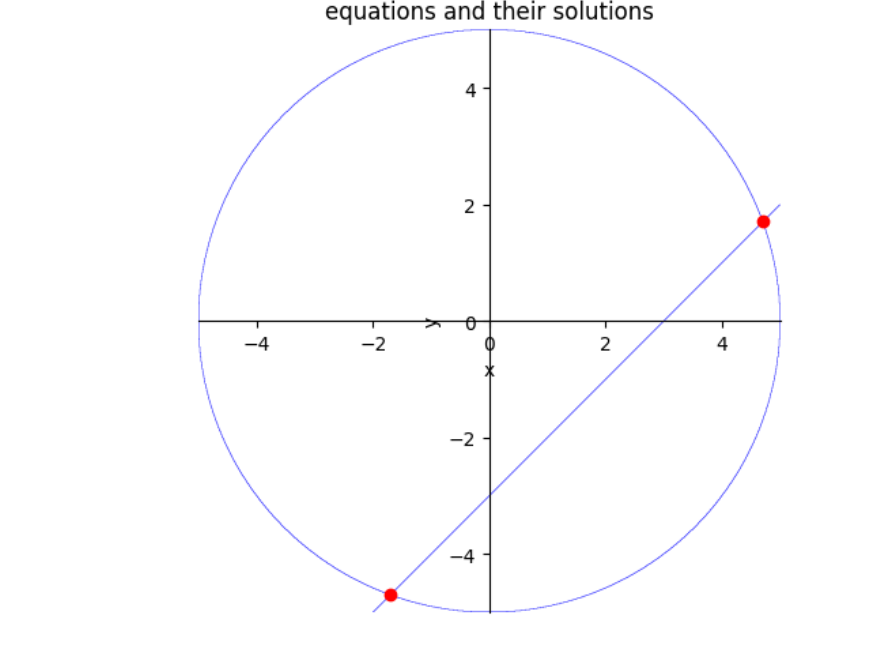

## Funciones racionales


In [59]:
x = symbols('x')
f = x**2 + 1
g = x**2 - 1

h = 1/f + 1/g
h

1/(x**2 + 1) + 1/(x**2 - 1)

In [60]:
fs = simplify(h) # sumelas
fs

2*x**2/(x**4 - 1)

In [61]:
# fracciones parciales (apart). Separa una fraccion en sus partes
from sympy import apart
fp = apart(fs)
fp

1/(x**2 + 1) - 1/(2*(x + 1)) + 1/(2*(x - 1))

**parsing** (depurar expresiones, examinar, extraer)




In [63]:
#dir(fp)
fp.args

(1/(x**2 + 1), 1/(2*(x - 1)), -1/(2*(x + 1)))

In [64]:
# extraemos fraccion-por-fraccion
fp0 = fp.args[0]
fp1 = fp.args[1]
fp2 = fp.args[2]

display(fp0,fp1,fp2)


1/(x**2 + 1)

1/(2*(x - 1))

-1/(2*(x + 1))

In [65]:
display(fp0 + fp1 + fp2)

1/(x**2 + 1) - 1/(2*(x + 1)) + 1/(2*(x - 1))

In [66]:
simplify(fp0+fp1+fp2)

2*x**2/(x**4 - 1)

In [67]:
# sumar sin simplificar
toghe = (fp0+fp1+fp2).together()
toghe

(2*(x - 1)*(x + 1) - (x - 1)*(x**2 + 1) + (x + 1)*(x**2 + 1))/(2*(x - 1)*(x + 1)*(x**2 + 1))

In [68]:
simplify(toghe)

2*x**2/(x**4 - 1)

In [69]:
fp0*fp1

1/(2*(x - 1)*(x**2 + 1))

In [70]:
fp0/fp1

(2*x - 2)/(x**2 + 1)

In [71]:
apart(fp0/fp1)

2*(x - 1)/(x**2 + 1)

In [72]:
# graficamos, con 'plot'
toPlot = fp0*fp1/fp2
toPlot



(-2*x - 2)/(2*(x - 1)*(x**2 + 1))

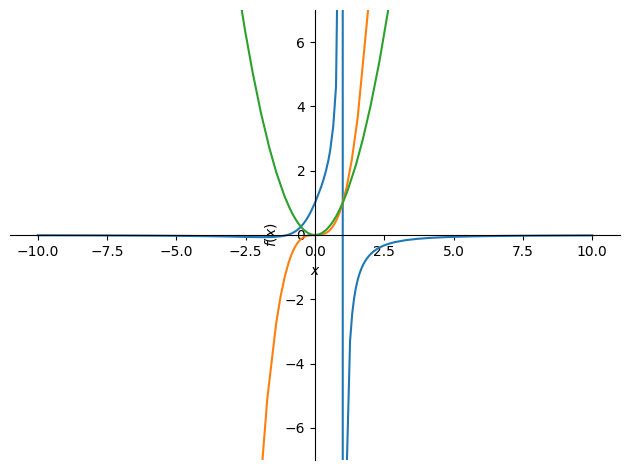

In [83]:
from sympy import plot # otra herramienta nueva
import numpy as np
def sx(x):
    return np.sin(x)

plot(toPlot, x**3, x**2, ylim=[-7, 7])